### Deliverable 1: Preprocessing the Data for a Neural Network

In [9]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [10]:
# Drop the non-beneficial ID column 'EIN'.
application_df.drop(['EIN'], axis = 1, inplace=True)
application_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
34294,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [11]:
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [12]:
# NAME value counts for binning
name_counts = application_df.NAME.value_counts()
name_counts

PARENT BOOSTER USA INC                                    1260
TOPS CLUB INC                                              765
UNITED STATES BOWLING CONGRESS INC                         700
WASHINGTON STATE UNIVERSITY                                492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC            408
                                                          ... 
PARTNERSHIP FOR INTERNATIONAL MEDICAL ACCESS-NORTHWEST       1
ST BRIDGET COUNCIL 9800                                      1
LOS ANGELES CHAPTER INTL SOCIETY                             1
SOUTH LOUISIANA CENTER FOR THE ARTS                          1
RICHLAND COUNTY EMERGENCY SHELTER COALITION                  1
Name: NAME, Length: 19568, dtype: int64

In [13]:
# Counts less than or equal to 5?
name_counts[name_counts <= 5]

NATIONAL ASSOCIATION OF COMPOSERS USA                     5
PTA GEORGIA CONGRESS                                      5
ACTS MISSIONS                                             5
WARRIOR BROTHERHOOD OF VETERANS MOTORCYCLE CLUB INC       5
CHILDRENS HEART FOUNDATION                                5
                                                         ..
PARTNERSHIP FOR INTERNATIONAL MEDICAL ACCESS-NORTHWEST    1
ST BRIDGET COUNCIL 9800                                   1
LOS ANGELES CHAPTER INTL SOCIETY                          1
SOUTH LOUISIANA CENTER FOR THE ARTS                       1
RICHLAND COUNTY EMERGENCY SHELTER COALITION               1
Name: NAME, Length: 19214, dtype: int64

<AxesSubplot:ylabel='Density'>

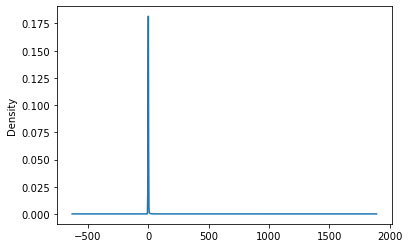

In [14]:
name_counts.plot.density()

In [15]:
# Determine which values to replace if counts are less than or equal to 5
replace_name = list(name_counts[name_counts <= 5].index)

# Replace in dataframe
for name_variable in replace_name:
    application_df.NAME = application_df.NAME.replace(name_variable,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                                         20043
PARENT BOOSTER USA INC                                         1260
TOPS CLUB INC                                                   765
UNITED STATES BOWLING CONGRESS INC                              700
WASHINGTON STATE UNIVERSITY                                     492
                                                              ...  
DEPARTMENT OF OREGON LADIES AUXILLARY TO THE VFW OF THE US        6
REFRIGERATION SERVICE ENGINEERS SOCIETY                           6
HUGH OBRIAN YOUTH LEADERSHIP                                      6
THE INTERIOR DESIGN SOCIETY INC                                   6
DAMAGE PREVENTION COUNCIL OF TEXAS                                6
Name: NAME, Length: 355, dtype: int64

In [16]:
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [17]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = list(application_type_counts[application_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [18]:
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C3700        1
C2600        1
C5200        1
C1570        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [19]:
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [20]:
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [21]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)


# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE

encode1 = enc.fit_transform(application_df[application_cat])

encode_df = pd.DataFrame(encode1)

              

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
# Split our preprocessed data into our features and target arrays

# Remove loan status target from features data
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns=["IS_SUCCESSFUL"], axis=1).values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #stratify=y

In [24]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
X_train.shape

(25724, 398)

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len(X_train[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 75
hidden_nodes_layer3 = 10


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               39900     
_________________________________________________________________
dense_1 (Dense)              (None, 75)                7575      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                760       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 48,246
Trainable params: 48,246
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints2/",exist_ok=True)
checkpoint_path = "checkpoints2/weights.{epoch:02d}.hdf5"


# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
  672/25724 [..............................] - ETA: 13s - loss: 0.7236 - acc: 0.6042
Epoch 00001: saving model to checkpoints2/weights.01.hdf5
 1888/25724 [=>............................] - ETA: 6s - loss: 0.6488 - acc: 0.6785
Epoch 00001: saving model to checkpoints2/weights.01.hdf5
 2880/25724 [==>...........................] - ETA: 5s - loss: 0.6159 - acc: 0.6976
Epoch 00001: saving model to checkpoints2/weights.01.hdf5
 3648/25724 [===>..........................] - ETA: 4s - loss: 0.5915 - acc: 0.7124
Epoch 00001: saving model to checkpoints2/weights.01.hdf5
 4672/25724 [====>.........................] - ETA: 3s - loss: 0.5653 - acc: 0.7310
Epoch 00001: saving model to checkpoints2/weights.01.hdf5
 6112/25724 [======>.......................] - ETA: 3s - loss: 0.5384 - acc: 0.7459
Epoch 00001: saving model to checkpoints2/weights.01.hdf5
 6976/25724 [=======>....................

 4640/25724 [====>.........................] - ETA: 2s - loss: 0.4207 - acc: 0.7968
Epoch 00003: saving model to checkpoints2/weights.03.hdf5
 5856/25724 [=====>........................] - ETA: 2s - loss: 0.4228 - acc: 0.7947
Epoch 00003: saving model to checkpoints2/weights.03.hdf5
 6368/25724 [======>.......................] - ETA: 2s - loss: 0.4233 - acc: 0.7957
Epoch 00003: saving model to checkpoints2/weights.03.hdf5
 7744/25724 [========>.....................] - ETA: 1s - loss: 0.4176 - acc: 0.7973
Epoch 00003: saving model to checkpoints2/weights.03.hdf5
 8320/25724 [========>.....................] - ETA: 1s - loss: 0.4188 - acc: 0.7959
Epoch 00003: saving model to checkpoints2/weights.03.hdf5
 9664/25724 [==========>...................] - ETA: 1s - loss: 0.4198 - acc: 0.7951
Epoch 00003: saving model to checkpoints2/weights.03.hdf5
10720/25724 [===========>..................] - ETA: 1s - loss: 0.4226 - acc: 0.7943
Epoch 00003: saving model to checkpoints2/weights.03.hdf5
11296/

10112/25724 [==========>...................] - ETA: 1s - loss: 0.4223 - acc: 0.7956
Epoch 00005: saving model to checkpoints2/weights.05.hdf5
11456/25724 [============>.................] - ETA: 1s - loss: 0.4224 - acc: 0.7952
Epoch 00005: saving model to checkpoints2/weights.05.hdf5
12480/25724 [=============>................] - ETA: 1s - loss: 0.4226 - acc: 0.7954
Epoch 00005: saving model to checkpoints2/weights.05.hdf5
13792/25724 [===============>..............] - ETA: 1s - loss: 0.4246 - acc: 0.7941
Epoch 00005: saving model to checkpoints2/weights.05.hdf5
14432/25724 [===============>..............] - ETA: 0s - loss: 0.4246 - acc: 0.7940
Epoch 00005: saving model to checkpoints2/weights.05.hdf5
15808/25724 [=================>............] - ETA: 0s - loss: 0.4243 - acc: 0.7947
Epoch 00005: saving model to checkpoints2/weights.05.hdf5
16480/25724 [==================>...........] - ETA: 0s - loss: 0.4242 - acc: 0.7951
Epoch 00005: saving model to checkpoints2/weights.05.hdf5
17760/

15936/25724 [=================>............] - ETA: 0s - loss: 0.4189 - acc: 0.7985
Epoch 00007: saving model to checkpoints2/weights.07.hdf5
17376/25724 [===================>..........] - ETA: 0s - loss: 0.4201 - acc: 0.7982
Epoch 00007: saving model to checkpoints2/weights.07.hdf5
18016/25724 [====================>.........] - ETA: 0s - loss: 0.4199 - acc: 0.7987
Epoch 00007: saving model to checkpoints2/weights.07.hdf5
19520/25724 [=====================>........] - ETA: 0s - loss: 0.4201 - acc: 0.7990
Epoch 00007: saving model to checkpoints2/weights.07.hdf5
20000/25724 [======================>.......] - ETA: 0s - loss: 0.4203 - acc: 0.7985
Epoch 00007: saving model to checkpoints2/weights.07.hdf5
21536/25724 [========================>.....] - ETA: 0s - loss: 0.4217 - acc: 0.7975
Epoch 00007: saving model to checkpoints2/weights.07.hdf5
22144/25724 [========================>.....] - ETA: 0s - loss: 0.4216 - acc: 0.7973
Epoch 00007: saving model to checkpoints2/weights.07.hdf5
23616/

22432/25724 [=========================>....] - ETA: 0s - loss: 0.4183 - acc: 0.7998
Epoch 00009: saving model to checkpoints2/weights.09.hdf5
22848/25724 [=========================>....] - ETA: 0s - loss: 0.4181 - acc: 0.7997
Epoch 00009: saving model to checkpoints2/weights.09.hdf5
24160/25724 [===========================>..] - ETA: 0s - loss: 0.4190 - acc: 0.7992
Epoch 00009: saving model to checkpoints2/weights.09.hdf5
25568/25724 [============================>.] - ETA: 0s - loss: 0.4189 - acc: 0.7998
Epoch 00009: saving model to checkpoints2/weights.09.hdf5
25724/25724 [==============================] - 3s 104us/sample - loss: 0.4191 - acc: 0.7998
Epoch 10/100
  800/25724 [..............................] - ETA: 1s - loss: 0.4403 - acc: 0.7850
Epoch 00010: saving model to checkpoints2/weights.10.hdf5
 1184/25724 [>.............................] - ETA: 2s - loss: 0.4329 - acc: 0.7863
Epoch 00010: saving model to checkpoints2/weights.10.hdf5
 2688/25724 [==>...........................

 1312/25724 [>.............................] - ETA: 2s - loss: 0.4342 - acc: 0.7965
Epoch 00012: saving model to checkpoints2/weights.12.hdf5
 2624/25724 [==>...........................] - ETA: 1s - loss: 0.4302 - acc: 0.7900
Epoch 00012: saving model to checkpoints2/weights.12.hdf5
 3200/25724 [==>...........................] - ETA: 1s - loss: 0.4292 - acc: 0.7906
Epoch 00012: saving model to checkpoints2/weights.12.hdf5
 4512/25724 [====>.........................] - ETA: 1s - loss: 0.4248 - acc: 0.7948
Epoch 00012: saving model to checkpoints2/weights.12.hdf5
 5088/25724 [====>.........................] - ETA: 1s - loss: 0.4247 - acc: 0.7948
Epoch 00012: saving model to checkpoints2/weights.12.hdf5
 6528/25724 [======>.......................] - ETA: 1s - loss: 0.4208 - acc: 0.7970
Epoch 00012: saving model to checkpoints2/weights.12.hdf5
 7776/25724 [========>.....................] - ETA: 1s - loss: 0.4169 - acc: 0.7982
Epoch 00012: saving model to checkpoints2/weights.12.hdf5
 8352/

 7296/25724 [=======>......................] - ETA: 1s - loss: 0.4015 - acc: 0.8132
Epoch 00014: saving model to checkpoints2/weights.14.hdf5
 7936/25724 [========>.....................] - ETA: 1s - loss: 0.4031 - acc: 0.8116
Epoch 00014: saving model to checkpoints2/weights.14.hdf5
 9440/25724 [==========>...................] - ETA: 1s - loss: 0.4045 - acc: 0.8105
Epoch 00014: saving model to checkpoints2/weights.14.hdf5
10048/25724 [==========>...................] - ETA: 1s - loss: 0.4053 - acc: 0.8095
Epoch 00014: saving model to checkpoints2/weights.14.hdf5
11488/25724 [============>.................] - ETA: 1s - loss: 0.4062 - acc: 0.8086
Epoch 00014: saving model to checkpoints2/weights.14.hdf5
12480/25724 [=============>................] - ETA: 1s - loss: 0.4060 - acc: 0.8089
Epoch 00014: saving model to checkpoints2/weights.14.hdf5
13376/25724 [==============>...............] - ETA: 1s - loss: 0.4078 - acc: 0.8082
Epoch 00014: saving model to checkpoints2/weights.14.hdf5
14400/

13088/25724 [==============>...............] - ETA: 1s - loss: 0.4111 - acc: 0.8033
Epoch 00016: saving model to checkpoints2/weights.16.hdf5
14432/25724 [===============>..............] - ETA: 1s - loss: 0.4110 - acc: 0.8030
Epoch 00016: saving model to checkpoints2/weights.16.hdf5
14944/25724 [================>.............] - ETA: 1s - loss: 0.4102 - acc: 0.8035
Epoch 00016: saving model to checkpoints2/weights.16.hdf5
16256/25724 [=================>............] - ETA: 1s - loss: 0.4124 - acc: 0.8015
Epoch 00016: saving model to checkpoints2/weights.16.hdf5
17184/25724 [===================>..........] - ETA: 1s - loss: 0.4129 - acc: 0.8013
Epoch 00016: saving model to checkpoints2/weights.16.hdf5
18432/25724 [====================>.........] - ETA: 0s - loss: 0.4129 - acc: 0.8018
Epoch 00016: saving model to checkpoints2/weights.16.hdf5
18880/25724 [=====================>........] - ETA: 0s - loss: 0.4122 - acc: 0.8021
Epoch 00016: saving model to checkpoints2/weights.16.hdf5
20320/

19072/25724 [=====================>........] - ETA: 0s - loss: 0.4124 - acc: 0.8037
Epoch 00018: saving model to checkpoints2/weights.18.hdf5
19712/25724 [=====================>........] - ETA: 0s - loss: 0.4126 - acc: 0.8037
Epoch 00018: saving model to checkpoints2/weights.18.hdf5
21120/25724 [=======================>......] - ETA: 0s - loss: 0.4137 - acc: 0.8023
Epoch 00018: saving model to checkpoints2/weights.18.hdf5
21696/25724 [========================>.....] - ETA: 0s - loss: 0.4145 - acc: 0.8023
Epoch 00018: saving model to checkpoints2/weights.18.hdf5
23200/25724 [==========================>...] - ETA: 0s - loss: 0.4141 - acc: 0.8025
Epoch 00018: saving model to checkpoints2/weights.18.hdf5
23840/25724 [==========================>...] - ETA: 0s - loss: 0.4134 - acc: 0.8031
Epoch 00018: saving model to checkpoints2/weights.18.hdf5
25248/25724 [============================>.] - ETA: 0s - loss: 0.4124 - acc: 0.8041
Epoch 00018: saving model to checkpoints2/weights.18.hdf5
25724/

24928/25724 [============================>.] - ETA: 0s - loss: 0.4113 - acc: 0.8037
Epoch 00020: saving model to checkpoints2/weights.20.hdf5
25724/25724 [==============================] - 2s 95us/sample - loss: 0.4112 - acc: 0.8039
Epoch 21/100
   32/25724 [..............................] - ETA: 2s - loss: 0.4274 - acc: 0.8125
Epoch 00021: saving model to checkpoints2/weights.21.hdf5
 1472/25724 [>.............................] - ETA: 1s - loss: 0.3955 - acc: 0.8152
Epoch 00021: saving model to checkpoints2/weights.21.hdf5
 2080/25724 [=>............................] - ETA: 1s - loss: 0.3961 - acc: 0.8163
Epoch 00021: saving model to checkpoints2/weights.21.hdf5
 3552/25724 [===>..........................] - ETA: 1s - loss: 0.3997 - acc: 0.8119
Epoch 00021: saving model to checkpoints2/weights.21.hdf5
 4128/25724 [===>..........................] - ETA: 1s - loss: 0.4039 - acc: 0.8103
Epoch 00021: saving model to checkpoints2/weights.21.hdf5
 5376/25724 [=====>........................]

 3808/25724 [===>..........................] - ETA: 2s - loss: 0.4061 - acc: 0.8049
Epoch 00023: saving model to checkpoints2/weights.23.hdf5
 5152/25724 [=====>........................] - ETA: 2s - loss: 0.4060 - acc: 0.8086
Epoch 00023: saving model to checkpoints2/weights.23.hdf5
 5696/25724 [=====>........................] - ETA: 2s - loss: 0.4039 - acc: 0.8099
Epoch 00023: saving model to checkpoints2/weights.23.hdf5
 7040/25724 [=======>......................] - ETA: 1s - loss: 0.4037 - acc: 0.8088
Epoch 00023: saving model to checkpoints2/weights.23.hdf5
 8256/25724 [========>.....................] - ETA: 1s - loss: 0.4051 - acc: 0.8069
Epoch 00023: saving model to checkpoints2/weights.23.hdf5
 8832/25724 [=========>....................] - ETA: 1s - loss: 0.4054 - acc: 0.8068
Epoch 00023: saving model to checkpoints2/weights.23.hdf5
 9952/25724 [==========>...................] - ETA: 1s - loss: 0.4042 - acc: 0.8080
Epoch 00023: saving model to checkpoints2/weights.23.hdf5
11264/

10176/25724 [==========>...................] - ETA: 1s - loss: 0.4027 - acc: 0.8078
Epoch 00025: saving model to checkpoints2/weights.25.hdf5
10656/25724 [===========>..................] - ETA: 1s - loss: 0.4029 - acc: 0.8077
Epoch 00025: saving model to checkpoints2/weights.25.hdf5
12000/25724 [============>.................] - ETA: 1s - loss: 0.4034 - acc: 0.8073
Epoch 00025: saving model to checkpoints2/weights.25.hdf5
13184/25724 [==============>...............] - ETA: 1s - loss: 0.4050 - acc: 0.8080
Epoch 00025: saving model to checkpoints2/weights.25.hdf5
13664/25724 [==============>...............] - ETA: 1s - loss: 0.4065 - acc: 0.8071
Epoch 00025: saving model to checkpoints2/weights.25.hdf5
15104/25724 [================>.............] - ETA: 0s - loss: 0.4050 - acc: 0.8075
Epoch 00025: saving model to checkpoints2/weights.25.hdf5
16352/25724 [==================>...........] - ETA: 0s - loss: 0.4078 - acc: 0.8060
Epoch 00025: saving model to checkpoints2/weights.25.hdf5
16800/

15520/25724 [=================>............] - ETA: 0s - loss: 0.4113 - acc: 0.8027
Epoch 00027: saving model to checkpoints2/weights.27.hdf5
16736/25724 [==================>...........] - ETA: 0s - loss: 0.4104 - acc: 0.8029
Epoch 00027: saving model to checkpoints2/weights.27.hdf5
18080/25724 [====================>.........] - ETA: 0s - loss: 0.4108 - acc: 0.8028
Epoch 00027: saving model to checkpoints2/weights.27.hdf5
18720/25724 [====================>.........] - ETA: 0s - loss: 0.4102 - acc: 0.8031
Epoch 00027: saving model to checkpoints2/weights.27.hdf5
20032/25724 [======================>.......] - ETA: 0s - loss: 0.4100 - acc: 0.8029
Epoch 00027: saving model to checkpoints2/weights.27.hdf5
20640/25724 [=======================>......] - ETA: 0s - loss: 0.4095 - acc: 0.8030
Epoch 00027: saving model to checkpoints2/weights.27.hdf5
21760/25724 [========================>.....] - ETA: 0s - loss: 0.4089 - acc: 0.8037
Epoch 00027: saving model to checkpoints2/weights.27.hdf5
23136/

21856/25724 [========================>.....] - ETA: 0s - loss: 0.4069 - acc: 0.8063
Epoch 00029: saving model to checkpoints2/weights.29.hdf5
22304/25724 [=========================>....] - ETA: 0s - loss: 0.4068 - acc: 0.8062
Epoch 00029: saving model to checkpoints2/weights.29.hdf5
23840/25724 [==========================>...] - ETA: 0s - loss: 0.4077 - acc: 0.8054
Epoch 00029: saving model to checkpoints2/weights.29.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 0.4079 - acc: 0.8051
Epoch 00029: saving model to checkpoints2/weights.29.hdf5
25724/25724 [==============================] - 3s 115us/sample - loss: 0.4083 - acc: 0.8052
Epoch 30/100
   32/25724 [..............................] - ETA: 2s - loss: 0.4127 - acc: 0.7812
Epoch 00030: saving model to checkpoints2/weights.30.hdf5
 1088/25724 [>.............................] - ETA: 2s - loss: 0.4041 - acc: 0.8097
Epoch 00030: saving model to checkpoints2/weights.30.hdf5
 2368/25724 [=>............................

  576/25724 [..............................] - ETA: 2s - loss: 0.4113 - acc: 0.8073
Epoch 00032: saving model to checkpoints2/weights.32.hdf5
 1856/25724 [=>............................] - ETA: 2s - loss: 0.4168 - acc: 0.8050
Epoch 00032: saving model to checkpoints2/weights.32.hdf5
 2432/25724 [=>............................] - ETA: 2s - loss: 0.4139 - acc: 0.8059
Epoch 00032: saving model to checkpoints2/weights.32.hdf5
 3872/25724 [===>..........................] - ETA: 1s - loss: 0.4070 - acc: 0.8099
Epoch 00032: saving model to checkpoints2/weights.32.hdf5
 4896/25724 [====>.........................] - ETA: 1s - loss: 0.4055 - acc: 0.8109
Epoch 00032: saving model to checkpoints2/weights.32.hdf5
 5984/25724 [=====>........................] - ETA: 1s - loss: 0.4035 - acc: 0.8098
Epoch 00032: saving model to checkpoints2/weights.32.hdf5
 6592/25724 [======>.......................] - ETA: 1s - loss: 0.4066 - acc: 0.8087
Epoch 00032: saving model to checkpoints2/weights.32.hdf5
 7936/

 6528/25724 [======>.......................] - ETA: 1s - loss: 0.4048 - acc: 0.8091
Epoch 00034: saving model to checkpoints2/weights.34.hdf5
 7776/25724 [========>.....................] - ETA: 1s - loss: 0.4023 - acc: 0.8097
Epoch 00034: saving model to checkpoints2/weights.34.hdf5
 8512/25724 [========>.....................] - ETA: 1s - loss: 0.4033 - acc: 0.8104
Epoch 00034: saving model to checkpoints2/weights.34.hdf5
 9984/25724 [==========>...................] - ETA: 1s - loss: 0.4021 - acc: 0.8090
Epoch 00034: saving model to checkpoints2/weights.34.hdf5
10528/25724 [===========>..................] - ETA: 1s - loss: 0.4020 - acc: 0.8080
Epoch 00034: saving model to checkpoints2/weights.34.hdf5
11488/25724 [============>.................] - ETA: 1s - loss: 0.4020 - acc: 0.8077
Epoch 00034: saving model to checkpoints2/weights.34.hdf5
12832/25724 [=============>................] - ETA: 1s - loss: 0.4011 - acc: 0.8088
Epoch 00034: saving model to checkpoints2/weights.34.hdf5
13984/

12640/25724 [=============>................] - ETA: 1s - loss: 0.4034 - acc: 0.8093
Epoch 00036: saving model to checkpoints2/weights.36.hdf5
13344/25724 [==============>...............] - ETA: 1s - loss: 0.4019 - acc: 0.8101
Epoch 00036: saving model to checkpoints2/weights.36.hdf5
14752/25724 [================>.............] - ETA: 1s - loss: 0.4032 - acc: 0.8097
Epoch 00036: saving model to checkpoints2/weights.36.hdf5
15872/25724 [=================>............] - ETA: 0s - loss: 0.4041 - acc: 0.8088
Epoch 00036: saving model to checkpoints2/weights.36.hdf5
16800/25724 [==================>...........] - ETA: 0s - loss: 0.4029 - acc: 0.8093
Epoch 00036: saving model to checkpoints2/weights.36.hdf5
17376/25724 [===================>..........] - ETA: 0s - loss: 0.4040 - acc: 0.8085
Epoch 00036: saving model to checkpoints2/weights.36.hdf5
18784/25724 [====================>.........] - ETA: 0s - loss: 0.4049 - acc: 0.8071
Epoch 00036: saving model to checkpoints2/weights.36.hdf5
19360/

18720/25724 [====================>.........] - ETA: 0s - loss: 0.4047 - acc: 0.8069
Epoch 00038: saving model to checkpoints2/weights.38.hdf5
19232/25724 [=====================>........] - ETA: 0s - loss: 0.4041 - acc: 0.8077
Epoch 00038: saving model to checkpoints2/weights.38.hdf5
20480/25724 [======================>.......] - ETA: 0s - loss: 0.4044 - acc: 0.8079
Epoch 00038: saving model to checkpoints2/weights.38.hdf5
21664/25724 [========================>.....] - ETA: 0s - loss: 0.4051 - acc: 0.8074
Epoch 00038: saving model to checkpoints2/weights.38.hdf5
22240/25724 [========================>.....] - ETA: 0s - loss: 0.4048 - acc: 0.8076
Epoch 00038: saving model to checkpoints2/weights.38.hdf5
23520/25724 [==========================>...] - ETA: 0s - loss: 0.4055 - acc: 0.8069
Epoch 00038: saving model to checkpoints2/weights.38.hdf5
24896/25724 [============================>.] - ETA: 0s - loss: 0.4049 - acc: 0.8071
Epoch 00038: saving model to checkpoints2/weights.38.hdf5
25724/

24480/25724 [===========================>..] - ETA: 0s - loss: 0.4048 - acc: 0.8070
Epoch 00040: saving model to checkpoints2/weights.40.hdf5
25664/25724 [============================>.] - ETA: 0s - loss: 0.4048 - acc: 0.8072
Epoch 00040: saving model to checkpoints2/weights.40.hdf5
25724/25724 [==============================] - 3s 102us/sample - loss: 0.4048 - acc: 0.8073
Epoch 41/100
  768/25724 [..............................] - ETA: 1s - loss: 0.4071 - acc: 0.8112
Epoch 00041: saving model to checkpoints2/weights.41.hdf5
 1920/25724 [=>............................] - ETA: 1s - loss: 0.3982 - acc: 0.8151
Epoch 00041: saving model to checkpoints2/weights.41.hdf5
 2560/25724 [=>............................] - ETA: 1s - loss: 0.3961 - acc: 0.8148
Epoch 00041: saving model to checkpoints2/weights.41.hdf5
 3776/25724 [===>..........................] - ETA: 1s - loss: 0.3943 - acc: 0.8175
Epoch 00041: saving model to checkpoints2/weights.41.hdf5
 5088/25724 [====>.........................

 3424/25724 [==>...........................] - ETA: 2s - loss: 0.3917 - acc: 0.8163
Epoch 00043: saving model to checkpoints2/weights.43.hdf5
 4800/25724 [====>.........................] - ETA: 1s - loss: 0.3961 - acc: 0.8117
Epoch 00043: saving model to checkpoints2/weights.43.hdf5
 5440/25724 [=====>........................] - ETA: 1s - loss: 0.3944 - acc: 0.8153
Epoch 00043: saving model to checkpoints2/weights.43.hdf5
 6848/25724 [======>.......................] - ETA: 1s - loss: 0.3913 - acc: 0.8156
Epoch 00043: saving model to checkpoints2/weights.43.hdf5
 7520/25724 [=======>......................] - ETA: 1s - loss: 0.3923 - acc: 0.8140
Epoch 00043: saving model to checkpoints2/weights.43.hdf5
 8896/25724 [=========>....................] - ETA: 1s - loss: 0.3989 - acc: 0.8096
Epoch 00043: saving model to checkpoints2/weights.43.hdf5
 9536/25724 [==========>...................] - ETA: 1s - loss: 0.3994 - acc: 0.8096
Epoch 00043: saving model to checkpoints2/weights.43.hdf5
10208/

 9280/25724 [=========>....................] - ETA: 1s - loss: 0.3994 - acc: 0.8126
Epoch 00045: saving model to checkpoints2/weights.45.hdf5
 9984/25724 [==========>...................] - ETA: 1s - loss: 0.4013 - acc: 0.8103
Epoch 00045: saving model to checkpoints2/weights.45.hdf5
11584/25724 [============>.................] - ETA: 1s - loss: 0.4020 - acc: 0.8094
Epoch 00045: saving model to checkpoints2/weights.45.hdf5
12320/25724 [=============>................] - ETA: 0s - loss: 0.4008 - acc: 0.8105
Epoch 00045: saving model to checkpoints2/weights.45.hdf5
12992/25724 [==============>...............] - ETA: 0s - loss: 0.4025 - acc: 0.8093
Epoch 00045: saving model to checkpoints2/weights.45.hdf5
14688/25724 [================>.............] - ETA: 0s - loss: 0.4047 - acc: 0.8079
Epoch 00045: saving model to checkpoints2/weights.45.hdf5
15360/25724 [================>.............] - ETA: 0s - loss: 0.4035 - acc: 0.8084
Epoch 00045: saving model to checkpoints2/weights.45.hdf5
16832/

15392/25724 [================>.............] - ETA: 0s - loss: 0.4060 - acc: 0.8050
Epoch 00047: saving model to checkpoints2/weights.47.hdf5
16064/25724 [=================>............] - ETA: 0s - loss: 0.4054 - acc: 0.8048
Epoch 00047: saving model to checkpoints2/weights.47.hdf5
17408/25724 [===================>..........] - ETA: 0s - loss: 0.4054 - acc: 0.8047
Epoch 00047: saving model to checkpoints2/weights.47.hdf5
18048/25724 [====================>.........] - ETA: 0s - loss: 0.4057 - acc: 0.8046
Epoch 00047: saving model to checkpoints2/weights.47.hdf5
19104/25724 [=====================>........] - ETA: 0s - loss: 0.4060 - acc: 0.8050
Epoch 00047: saving model to checkpoints2/weights.47.hdf5
20544/25724 [======================>.......] - ETA: 0s - loss: 0.4038 - acc: 0.8068
Epoch 00047: saving model to checkpoints2/weights.47.hdf5
21376/25724 [=======================>......] - ETA: 0s - loss: 0.4039 - acc: 0.8071
Epoch 00047: saving model to checkpoints2/weights.47.hdf5
22528/

20992/25724 [=======================>......] - ETA: 0s - loss: 0.4031 - acc: 0.8075
Epoch 00049: saving model to checkpoints2/weights.49.hdf5
21696/25724 [========================>.....] - ETA: 0s - loss: 0.4025 - acc: 0.8076
Epoch 00049: saving model to checkpoints2/weights.49.hdf5
23424/25724 [==========================>...] - ETA: 0s - loss: 0.4014 - acc: 0.8078
Epoch 00049: saving model to checkpoints2/weights.49.hdf5
24096/25724 [===========================>..] - ETA: 0s - loss: 0.4015 - acc: 0.8079
Epoch 00049: saving model to checkpoints2/weights.49.hdf5
25504/25724 [============================>.] - ETA: 0s - loss: 0.4020 - acc: 0.8079
Epoch 00049: saving model to checkpoints2/weights.49.hdf5
25724/25724 [==============================] - 2s 71us/sample - loss: 0.4024 - acc: 0.8078
Epoch 50/100
   32/25724 [..............................] - ETA: 3s - loss: 0.3633 - acc: 0.8125
Epoch 00050: saving model to checkpoints2/weights.50.hdf5
 1792/25724 [=>............................]

   32/25724 [..............................] - ETA: 2s - loss: 0.2167 - acc: 0.9375
Epoch 00052: saving model to checkpoints2/weights.52.hdf5
 1632/25724 [>.............................] - ETA: 1s - loss: 0.3885 - acc: 0.8150
Epoch 00052: saving model to checkpoints2/weights.52.hdf5
 2304/25724 [=>............................] - ETA: 1s - loss: 0.3927 - acc: 0.8160
Epoch 00052: saving model to checkpoints2/weights.52.hdf5
 2944/25724 [==>...........................] - ETA: 1s - loss: 0.3998 - acc: 0.8094
Epoch 00052: saving model to checkpoints2/weights.52.hdf5
 4448/25724 [====>.........................] - ETA: 1s - loss: 0.4015 - acc: 0.8044
Epoch 00052: saving model to checkpoints2/weights.52.hdf5
 5120/25724 [====>.........................] - ETA: 1s - loss: 0.3972 - acc: 0.8070
Epoch 00052: saving model to checkpoints2/weights.52.hdf5
 6656/25724 [======>.......................] - ETA: 1s - loss: 0.3951 - acc: 0.8102
Epoch 00052: saving model to checkpoints2/weights.52.hdf5
 7264/

 6432/25724 [======>.......................] - ETA: 1s - loss: 0.4046 - acc: 0.8046
Epoch 00054: saving model to checkpoints2/weights.54.hdf5
 7136/25724 [=======>......................] - ETA: 1s - loss: 0.4046 - acc: 0.8037
Epoch 00054: saving model to checkpoints2/weights.54.hdf5
 7808/25724 [========>.....................] - ETA: 1s - loss: 0.4027 - acc: 0.8052
Epoch 00054: saving model to checkpoints2/weights.54.hdf5
 9216/25724 [=========>....................] - ETA: 1s - loss: 0.3990 - acc: 0.8075
Epoch 00054: saving model to checkpoints2/weights.54.hdf5
 9856/25724 [==========>...................] - ETA: 1s - loss: 0.3990 - acc: 0.8076
Epoch 00054: saving model to checkpoints2/weights.54.hdf5
11488/25724 [============>.................] - ETA: 1s - loss: 0.4013 - acc: 0.8060
Epoch 00054: saving model to checkpoints2/weights.54.hdf5
12128/25724 [=============>................] - ETA: 1s - loss: 0.3996 - acc: 0.8078
Epoch 00054: saving model to checkpoints2/weights.54.hdf5
12800/

12000/25724 [============>.................] - ETA: 1s - loss: 0.4008 - acc: 0.8082
Epoch 00056: saving model to checkpoints2/weights.56.hdf5
12672/25724 [=============>................] - ETA: 0s - loss: 0.4009 - acc: 0.8074
Epoch 00056: saving model to checkpoints2/weights.56.hdf5
14016/25724 [===============>..............] - ETA: 0s - loss: 0.4030 - acc: 0.8060
Epoch 00056: saving model to checkpoints2/weights.56.hdf5
15360/25724 [================>.............] - ETA: 0s - loss: 0.4034 - acc: 0.8048
Epoch 00056: saving model to checkpoints2/weights.56.hdf5
15968/25724 [=================>............] - ETA: 0s - loss: 0.4044 - acc: 0.8049
Epoch 00056: saving model to checkpoints2/weights.56.hdf5
17440/25724 [===================>..........] - ETA: 0s - loss: 0.4029 - acc: 0.8064
Epoch 00056: saving model to checkpoints2/weights.56.hdf5
18144/25724 [====================>.........] - ETA: 0s - loss: 0.4024 - acc: 0.8073
Epoch 00056: saving model to checkpoints2/weights.56.hdf5
18784/

18208/25724 [====================>.........] - ETA: 0s - loss: 0.4030 - acc: 0.8053
Epoch 00058: saving model to checkpoints2/weights.58.hdf5
18688/25724 [====================>.........] - ETA: 0s - loss: 0.4037 - acc: 0.8048
Epoch 00058: saving model to checkpoints2/weights.58.hdf5
20032/25724 [======================>.......] - ETA: 0s - loss: 0.4030 - acc: 0.8060
Epoch 00058: saving model to checkpoints2/weights.58.hdf5
20608/25724 [=======================>......] - ETA: 0s - loss: 0.4030 - acc: 0.8061
Epoch 00058: saving model to checkpoints2/weights.58.hdf5
22112/25724 [========================>.....] - ETA: 0s - loss: 0.4018 - acc: 0.8073
Epoch 00058: saving model to checkpoints2/weights.58.hdf5
23392/25724 [==========================>...] - ETA: 0s - loss: 0.4012 - acc: 0.8077
Epoch 00058: saving model to checkpoints2/weights.58.hdf5
24032/25724 [===========================>..] - ETA: 0s - loss: 0.4013 - acc: 0.8077
Epoch 00058: saving model to checkpoints2/weights.58.hdf5
25440/

23488/25724 [==========================>...] - ETA: 0s - loss: 0.3998 - acc: 0.8077
Epoch 00060: saving model to checkpoints2/weights.60.hdf5
25088/25724 [============================>.] - ETA: 0s - loss: 0.4000 - acc: 0.8080
Epoch 00060: saving model to checkpoints2/weights.60.hdf5
25724/25724 [==============================] - 2s 76us/sample - loss: 0.4009 - acc: 0.8076
Epoch 61/100
   32/25724 [..............................] - ETA: 2s - loss: 0.5134 - acc: 0.6875
Epoch 00061: saving model to checkpoints2/weights.61.hdf5
 1344/25724 [>.............................] - ETA: 1s - loss: 0.4172 - acc: 0.7827
Epoch 00061: saving model to checkpoints2/weights.61.hdf5
 2048/25724 [=>............................] - ETA: 1s - loss: 0.4034 - acc: 0.8008
Epoch 00061: saving model to checkpoints2/weights.61.hdf5
 3424/25724 [==>...........................] - ETA: 1s - loss: 0.3999 - acc: 0.8093
Epoch 00061: saving model to checkpoints2/weights.61.hdf5
 4576/25724 [====>.........................]

 3200/25724 [==>...........................] - ETA: 1s - loss: 0.3990 - acc: 0.8075
Epoch 00063: saving model to checkpoints2/weights.63.hdf5
 3840/25724 [===>..........................] - ETA: 1s - loss: 0.3949 - acc: 0.8115
Epoch 00063: saving model to checkpoints2/weights.63.hdf5
 5216/25724 [=====>........................] - ETA: 1s - loss: 0.3937 - acc: 0.8112
Epoch 00063: saving model to checkpoints2/weights.63.hdf5
 5856/25724 [=====>........................] - ETA: 1s - loss: 0.3955 - acc: 0.8089
Epoch 00063: saving model to checkpoints2/weights.63.hdf5
 6560/25724 [======>.......................] - ETA: 1s - loss: 0.3921 - acc: 0.8111
Epoch 00063: saving model to checkpoints2/weights.63.hdf5
 8256/25724 [========>.....................] - ETA: 1s - loss: 0.3930 - acc: 0.8098
Epoch 00063: saving model to checkpoints2/weights.63.hdf5
 8832/25724 [=========>....................] - ETA: 1s - loss: 0.3946 - acc: 0.8087
Epoch 00063: saving model to checkpoints2/weights.63.hdf5
10400/

 8544/25724 [========>.....................] - ETA: 1s - loss: 0.3947 - acc: 0.8116
Epoch 00065: saving model to checkpoints2/weights.65.hdf5
 9824/25724 [==========>...................] - ETA: 1s - loss: 0.3964 - acc: 0.8092
Epoch 00065: saving model to checkpoints2/weights.65.hdf5
11136/25724 [===========>..................] - ETA: 1s - loss: 0.3954 - acc: 0.8104
Epoch 00065: saving model to checkpoints2/weights.65.hdf5
12096/25724 [=============>................] - ETA: 1s - loss: 0.3968 - acc: 0.8099
Epoch 00065: saving model to checkpoints2/weights.65.hdf5
12512/25724 [=============>................] - ETA: 1s - loss: 0.3964 - acc: 0.8099
Epoch 00065: saving model to checkpoints2/weights.65.hdf5
13952/25724 [===============>..............] - ETA: 0s - loss: 0.3966 - acc: 0.8103
Epoch 00065: saving model to checkpoints2/weights.65.hdf5
15264/25724 [================>.............] - ETA: 0s - loss: 0.3973 - acc: 0.8099
Epoch 00065: saving model to checkpoints2/weights.65.hdf5
15904/

14368/25724 [===============>..............] - ETA: 0s - loss: 0.3930 - acc: 0.8135
Epoch 00067: saving model to checkpoints2/weights.67.hdf5
15744/25724 [=================>............] - ETA: 0s - loss: 0.3941 - acc: 0.8121
Epoch 00067: saving model to checkpoints2/weights.67.hdf5
16320/25724 [==================>...........] - ETA: 0s - loss: 0.3951 - acc: 0.8111
Epoch 00067: saving model to checkpoints2/weights.67.hdf5
18048/25724 [====================>.........] - ETA: 0s - loss: 0.3987 - acc: 0.8086
Epoch 00067: saving model to checkpoints2/weights.67.hdf5
18752/25724 [====================>.........] - ETA: 0s - loss: 0.3987 - acc: 0.8088
Epoch 00067: saving model to checkpoints2/weights.67.hdf5
20192/25724 [======================>.......] - ETA: 0s - loss: 0.3993 - acc: 0.8089
Epoch 00067: saving model to checkpoints2/weights.67.hdf5
20896/25724 [=======================>......] - ETA: 0s - loss: 0.3984 - acc: 0.8091
Epoch 00067: saving model to checkpoints2/weights.67.hdf5
21600/

20320/25724 [======================>.......] - ETA: 0s - loss: 0.3989 - acc: 0.8089
Epoch 00069: saving model to checkpoints2/weights.69.hdf5
21792/25724 [========================>.....] - ETA: 0s - loss: 0.3997 - acc: 0.8084
Epoch 00069: saving model to checkpoints2/weights.69.hdf5
22432/25724 [=========================>....] - ETA: 0s - loss: 0.3991 - acc: 0.8088
Epoch 00069: saving model to checkpoints2/weights.69.hdf5
23904/25724 [==========================>...] - ETA: 0s - loss: 0.3988 - acc: 0.8087
Epoch 00069: saving model to checkpoints2/weights.69.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.3991 - acc: 0.8088
Epoch 00069: saving model to checkpoints2/weights.69.hdf5
25724/25724 [==============================] - 3s 115us/sample - loss: 0.3991 - acc: 0.8087
Epoch 70/100
   32/25724 [..............................] - ETA: 4s - loss: 0.3146 - acc: 0.8438
Epoch 00070: saving model to checkpoints2/weights.70.hdf5
 1024/25724 [>.............................

   32/25724 [..............................] - ETA: 2s - loss: 0.4689 - acc: 0.7188
Epoch 00072: saving model to checkpoints2/weights.72.hdf5
  544/25724 [..............................] - ETA: 2s - loss: 0.3939 - acc: 0.8051
Epoch 00072: saving model to checkpoints2/weights.72.hdf5
 1856/25724 [=>............................] - ETA: 2s - loss: 0.3988 - acc: 0.8066
Epoch 00072: saving model to checkpoints2/weights.72.hdf5
 3168/25724 [==>...........................] - ETA: 1s - loss: 0.4106 - acc: 0.8024
Epoch 00072: saving model to checkpoints2/weights.72.hdf5
 3616/25724 [===>..........................] - ETA: 1s - loss: 0.4107 - acc: 0.8023
Epoch 00072: saving model to checkpoints2/weights.72.hdf5
 5056/25724 [====>.........................] - ETA: 1s - loss: 0.4034 - acc: 0.8056
Epoch 00072: saving model to checkpoints2/weights.72.hdf5
 5696/25724 [=====>........................] - ETA: 1s - loss: 0.4003 - acc: 0.8088
Epoch 00072: saving model to checkpoints2/weights.72.hdf5
 7200/

 5792/25724 [=====>........................] - ETA: 1s - loss: 0.4063 - acc: 0.8046
Epoch 00074: saving model to checkpoints2/weights.74.hdf5
 6464/25724 [======>.......................] - ETA: 1s - loss: 0.4026 - acc: 0.8071
Epoch 00074: saving model to checkpoints2/weights.74.hdf5
 8032/25724 [========>.....................] - ETA: 1s - loss: 0.3994 - acc: 0.8100
Epoch 00074: saving model to checkpoints2/weights.74.hdf5
 8736/25724 [=========>....................] - ETA: 1s - loss: 0.4010 - acc: 0.8093
Epoch 00074: saving model to checkpoints2/weights.74.hdf5
 9408/25724 [=========>....................] - ETA: 1s - loss: 0.4003 - acc: 0.8090
Epoch 00074: saving model to checkpoints2/weights.74.hdf5
11008/25724 [===========>..................] - ETA: 1s - loss: 0.3999 - acc: 0.8097
Epoch 00074: saving model to checkpoints2/weights.74.hdf5
11680/25724 [============>.................] - ETA: 1s - loss: 0.3993 - acc: 0.8099
Epoch 00074: saving model to checkpoints2/weights.74.hdf5
12352/

11712/25724 [============>.................] - ETA: 0s - loss: 0.3947 - acc: 0.8128
Epoch 00076: saving model to checkpoints2/weights.76.hdf5
12416/25724 [=============>................] - ETA: 0s - loss: 0.3963 - acc: 0.8115
Epoch 00076: saving model to checkpoints2/weights.76.hdf5
13120/25724 [==============>...............] - ETA: 0s - loss: 0.3980 - acc: 0.8102
Epoch 00076: saving model to checkpoints2/weights.76.hdf5
14784/25724 [================>.............] - ETA: 0s - loss: 0.3984 - acc: 0.8096
Epoch 00076: saving model to checkpoints2/weights.76.hdf5
15520/25724 [=================>............] - ETA: 0s - loss: 0.3985 - acc: 0.8095
Epoch 00076: saving model to checkpoints2/weights.76.hdf5
16832/25724 [==================>...........] - ETA: 0s - loss: 0.3994 - acc: 0.8095
Epoch 00076: saving model to checkpoints2/weights.76.hdf5
17952/25724 [===================>..........] - ETA: 0s - loss: 0.3990 - acc: 0.8094
Epoch 00076: saving model to checkpoints2/weights.76.hdf5
18592/

17632/25724 [===================>..........] - ETA: 0s - loss: 0.4011 - acc: 0.8094
Epoch 00078: saving model to checkpoints2/weights.78.hdf5
18304/25724 [====================>.........] - ETA: 0s - loss: 0.4008 - acc: 0.8093
Epoch 00078: saving model to checkpoints2/weights.78.hdf5
19424/25724 [=====================>........] - ETA: 0s - loss: 0.4005 - acc: 0.8097
Epoch 00078: saving model to checkpoints2/weights.78.hdf5
20096/25724 [======================>.......] - ETA: 0s - loss: 0.4005 - acc: 0.8096
Epoch 00078: saving model to checkpoints2/weights.78.hdf5
21696/25724 [========================>.....] - ETA: 0s - loss: 0.4007 - acc: 0.8095
Epoch 00078: saving model to checkpoints2/weights.78.hdf5
22336/25724 [=========================>....] - ETA: 0s - loss: 0.3999 - acc: 0.8100
Epoch 00078: saving model to checkpoints2/weights.78.hdf5
23904/25724 [==========================>...] - ETA: 0s - loss: 0.4000 - acc: 0.8103
Epoch 00078: saving model to checkpoints2/weights.78.hdf5
24608/

23104/25724 [=========================>....] - ETA: 0s - loss: 0.4007 - acc: 0.8079
Epoch 00080: saving model to checkpoints2/weights.80.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 0.3986 - acc: 0.8090
Epoch 00080: saving model to checkpoints2/weights.80.hdf5
25024/25724 [============================>.] - ETA: 0s - loss: 0.3985 - acc: 0.8091
Epoch 00080: saving model to checkpoints2/weights.80.hdf5
25724/25724 [==============================] - 2s 77us/sample - loss: 0.3981 - acc: 0.8094
Epoch 81/100
  864/25724 [>.............................] - ETA: 1s - loss: 0.3785 - acc: 0.8171
Epoch 00081: saving model to checkpoints2/weights.81.hdf5
 1376/25724 [>.............................] - ETA: 1s - loss: 0.3870 - acc: 0.8140
Epoch 00081: saving model to checkpoints2/weights.81.hdf5
 2848/25724 [==>...........................] - ETA: 1s - loss: 0.3977 - acc: 0.8086
Epoch 00081: saving model to checkpoints2/weights.81.hdf5
 3488/25724 [===>..........................]

 2304/25724 [=>............................] - ETA: 1s - loss: 0.3920 - acc: 0.8082
Epoch 00083: saving model to checkpoints2/weights.83.hdf5
 3616/25724 [===>..........................] - ETA: 1s - loss: 0.3887 - acc: 0.8133
Epoch 00083: saving model to checkpoints2/weights.83.hdf5
 4288/25724 [====>.........................] - ETA: 1s - loss: 0.3870 - acc: 0.8141
Epoch 00083: saving model to checkpoints2/weights.83.hdf5
 5792/25724 [=====>........................] - ETA: 1s - loss: 0.3896 - acc: 0.8123
Epoch 00083: saving model to checkpoints2/weights.83.hdf5
 6464/25724 [======>.......................] - ETA: 1s - loss: 0.3931 - acc: 0.8110
Epoch 00083: saving model to checkpoints2/weights.83.hdf5
 7840/25724 [========>.....................] - ETA: 1s - loss: 0.3897 - acc: 0.8120
Epoch 00083: saving model to checkpoints2/weights.83.hdf5
 8512/25724 [========>.....................] - ETA: 1s - loss: 0.3915 - acc: 0.8118
Epoch 00083: saving model to checkpoints2/weights.83.hdf5
 9952/

 8576/25724 [=========>....................] - ETA: 1s - loss: 0.3947 - acc: 0.8102
Epoch 00085: saving model to checkpoints2/weights.85.hdf5
 9216/25724 [=========>....................] - ETA: 1s - loss: 0.3931 - acc: 0.8110
Epoch 00085: saving model to checkpoints2/weights.85.hdf5
10688/25724 [===========>..................] - ETA: 1s - loss: 0.3930 - acc: 0.8119
Epoch 00085: saving model to checkpoints2/weights.85.hdf5
11296/25724 [============>.................] - ETA: 1s - loss: 0.3939 - acc: 0.8121
Epoch 00085: saving model to checkpoints2/weights.85.hdf5
12672/25724 [=============>................] - ETA: 1s - loss: 0.3925 - acc: 0.8131
Epoch 00085: saving model to checkpoints2/weights.85.hdf5
13344/25724 [==============>...............] - ETA: 1s - loss: 0.3930 - acc: 0.8126
Epoch 00085: saving model to checkpoints2/weights.85.hdf5
14528/25724 [===============>..............] - ETA: 0s - loss: 0.3934 - acc: 0.8119
Epoch 00085: saving model to checkpoints2/weights.85.hdf5
15840/

14464/25724 [===============>..............] - ETA: 0s - loss: 0.3993 - acc: 0.8079
Epoch 00087: saving model to checkpoints2/weights.87.hdf5
15008/25724 [================>.............] - ETA: 0s - loss: 0.3992 - acc: 0.8078
Epoch 00087: saving model to checkpoints2/weights.87.hdf5
16480/25724 [==================>...........] - ETA: 0s - loss: 0.3977 - acc: 0.8090
Epoch 00087: saving model to checkpoints2/weights.87.hdf5
17088/25724 [==================>...........] - ETA: 0s - loss: 0.3979 - acc: 0.8088
Epoch 00087: saving model to checkpoints2/weights.87.hdf5
18496/25724 [====================>.........] - ETA: 0s - loss: 0.3985 - acc: 0.8083
Epoch 00087: saving model to checkpoints2/weights.87.hdf5
18912/25724 [=====================>........] - ETA: 0s - loss: 0.3978 - acc: 0.8091
Epoch 00087: saving model to checkpoints2/weights.87.hdf5
20544/25724 [======================>.......] - ETA: 0s - loss: 0.3985 - acc: 0.8087
Epoch 00087: saving model to checkpoints2/weights.87.hdf5
21152/

19936/25724 [======================>.......] - ETA: 0s - loss: 0.3953 - acc: 0.8102
Epoch 00089: saving model to checkpoints2/weights.89.hdf5
20672/25724 [=======================>......] - ETA: 0s - loss: 0.3955 - acc: 0.8102
Epoch 00089: saving model to checkpoints2/weights.89.hdf5
22336/25724 [=========================>....] - ETA: 0s - loss: 0.3976 - acc: 0.8094
Epoch 00089: saving model to checkpoints2/weights.89.hdf5
23008/25724 [=========================>....] - ETA: 0s - loss: 0.3978 - acc: 0.8096
Epoch 00089: saving model to checkpoints2/weights.89.hdf5
24544/25724 [===========================>..] - ETA: 0s - loss: 0.3975 - acc: 0.8099
Epoch 00089: saving model to checkpoints2/weights.89.hdf5
25120/25724 [============================>.] - ETA: 0s - loss: 0.3969 - acc: 0.8097
Epoch 00089: saving model to checkpoints2/weights.89.hdf5
25724/25724 [==============================] - 2s 92us/sample - loss: 0.3974 - acc: 0.8096
Epoch 90/100
  864/25724 [>.............................]

Epoch 92/100
   32/25724 [..............................] - ETA: 3s - loss: 0.4697 - acc: 0.7188
Epoch 00092: saving model to checkpoints2/weights.92.hdf5
 1504/25724 [>.............................] - ETA: 1s - loss: 0.3974 - acc: 0.7992
Epoch 00092: saving model to checkpoints2/weights.92.hdf5
 2176/25724 [=>............................] - ETA: 1s - loss: 0.3866 - acc: 0.8111
Epoch 00092: saving model to checkpoints2/weights.92.hdf5
 3424/25724 [==>...........................] - ETA: 1s - loss: 0.3849 - acc: 0.8137
Epoch 00092: saving model to checkpoints2/weights.92.hdf5
 4096/25724 [===>..........................] - ETA: 1s - loss: 0.3810 - acc: 0.8176
Epoch 00092: saving model to checkpoints2/weights.92.hdf5
 5568/25724 [=====>........................] - ETA: 1s - loss: 0.3809 - acc: 0.8145
Epoch 00092: saving model to checkpoints2/weights.92.hdf5
 6240/25724 [======>.......................] - ETA: 1s - loss: 0.3780 - acc: 0.8170
Epoch 00092: saving model to checkpoints2/weights.9

 6336/25724 [======>.......................] - ETA: 1s - loss: 0.3936 - acc: 0.8087
Epoch 00094: saving model to checkpoints2/weights.94.hdf5
 7008/25724 [=======>......................] - ETA: 1s - loss: 0.3936 - acc: 0.8094
Epoch 00094: saving model to checkpoints2/weights.94.hdf5
 8480/25724 [========>.....................] - ETA: 1s - loss: 0.3938 - acc: 0.8098
Epoch 00094: saving model to checkpoints2/weights.94.hdf5
 9216/25724 [=========>....................] - ETA: 1s - loss: 0.3926 - acc: 0.8109
Epoch 00094: saving model to checkpoints2/weights.94.hdf5
 9920/25724 [==========>...................] - ETA: 1s - loss: 0.3925 - acc: 0.8112
Epoch 00094: saving model to checkpoints2/weights.94.hdf5
11488/25724 [============>.................] - ETA: 1s - loss: 0.3932 - acc: 0.8119
Epoch 00094: saving model to checkpoints2/weights.94.hdf5
12256/25724 [=============>................] - ETA: 0s - loss: 0.3939 - acc: 0.8106
Epoch 00094: saving model to checkpoints2/weights.94.hdf5
12960/

11936/25724 [============>.................] - ETA: 1s - loss: 0.3973 - acc: 0.8108
Epoch 00096: saving model to checkpoints2/weights.96.hdf5
12608/25724 [=============>................] - ETA: 0s - loss: 0.3979 - acc: 0.8103
Epoch 00096: saving model to checkpoints2/weights.96.hdf5
14176/25724 [===============>..............] - ETA: 0s - loss: 0.3978 - acc: 0.8105
Epoch 00096: saving model to checkpoints2/weights.96.hdf5
14816/25724 [================>.............] - ETA: 0s - loss: 0.3968 - acc: 0.8105
Epoch 00096: saving model to checkpoints2/weights.96.hdf5
16384/25724 [==================>...........] - ETA: 0s - loss: 0.3965 - acc: 0.8107
Epoch 00096: saving model to checkpoints2/weights.96.hdf5
17024/25724 [==================>...........] - ETA: 0s - loss: 0.3954 - acc: 0.8113
Epoch 00096: saving model to checkpoints2/weights.96.hdf5
18528/25724 [====================>.........] - ETA: 0s - loss: 0.3954 - acc: 0.8104
Epoch 00096: saving model to checkpoints2/weights.96.hdf5
19424/

17920/25724 [===================>..........] - ETA: 0s - loss: 0.3965 - acc: 0.8100
Epoch 00098: saving model to checkpoints2/weights.98.hdf5
18656/25724 [====================>.........] - ETA: 0s - loss: 0.3959 - acc: 0.8104
Epoch 00098: saving model to checkpoints2/weights.98.hdf5
19968/25724 [======================>.......] - ETA: 0s - loss: 0.3962 - acc: 0.8103
Epoch 00098: saving model to checkpoints2/weights.98.hdf5
20672/25724 [=======================>......] - ETA: 0s - loss: 0.3954 - acc: 0.8105
Epoch 00098: saving model to checkpoints2/weights.98.hdf5
22048/25724 [========================>.....] - ETA: 0s - loss: 0.3965 - acc: 0.8100
Epoch 00098: saving model to checkpoints2/weights.98.hdf5
22720/25724 [=========================>....] - ETA: 0s - loss: 0.3963 - acc: 0.8098
Epoch 00098: saving model to checkpoints2/weights.98.hdf5
24256/25724 [===========================>..] - ETA: 0s - loss: 0.3965 - acc: 0.8106
Epoch 00098: saving model to checkpoints2/weights.98.hdf5
24960/

24000/25724 [==========================>...] - ETA: 0s - loss: 0.3974 - acc: 0.8102
Epoch 00100: saving model to checkpoints2/weights.100.hdf5
25088/25724 [============================>.] - ETA: 0s - loss: 0.3972 - acc: 0.8105
Epoch 00100: saving model to checkpoints2/weights.100.hdf5
25724/25724 [==============================] - 2s 73us/sample - loss: 0.3973 - acc: 0.8102
8575/8575 - 0s - loss: 0.5137 - acc: 0.7858
Loss: 0.5137325674104274, Accuracy: 0.7857726216316223


In [29]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")